In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def SamplePython(U,nsteps, xi, xi, indE, E0, flatness):
    "Wang Landau algorithm in Python"
    # Corresponding energy
    Ene = U(x,xi)
     
    
    # modification factor which modifies g(E)
    # according to the formula g(E) -> g(E)*f,
    # or equivalently, lngE[i] -> lngE[i] + lnf
    lnf = 1.0
    
    for itt in range(Nitt):
        ii = int(rand()*N2)       # The site to flip
        (i,j) = (ii % N, ii / N)  # The coordinates of the site
        S = latt[i,j]             # its spin
        WF = latt[(i+1)%N, j] + latt[i,(j+1)%N] + latt[(i-1)%N,j] + latt[i,(j-1)%N]
        Enew = Ene + 2*S*WF       # The energy of the tryed step
        P = exp(lngE[indE[Ene+E0]]-lngE[indE[Enew+E0]])  # Probability to accept according to Wang-Landau
        if P > rand():            # Metropolis condition
            latt[i,j] = -S        # step is accepted, update lattice
            Ene = Enew            #    and energy
            
        Hist[indE[Ene+E0]] += 1.  # Histogram is update at each Monte Carlo step!
        lngE[indE[Ene+E0]] += lnf # Density of states is also modified at each step!
        if itt % 100 == 0:
            aH = sum(Hist)/(N2+0.0) # mean Histogram
            mH = min(Hist)          # minimum of the Histogram
            if mH > aH*flatness:    # Is the histogram flat enough?
                Hist = zeros(len(Hist)) # Resetting histogram
                lnf /= 2.               # and reducing the modification factor
                print itt, 'histogram is flatt', mH, aH, 'f=', exp(lnf)
    return (lngE, Hist)

In [187]:
def harmonic(x, xi):
    x = x * np.ones(len(xi))
    return np.min(0.5*(x-xi)**2)

def sample(U, xinit,xi, nsteps, djump=0.1, xmin=0, xmax=10,
           kT=0.596, nstride=1, nprint=10000, verbose=False):
    x = xinit
    energy=U(x,xi)
    step = 0
    accepted_steps = 0
    traj = np.zeros(shape=(int(nsteps/nstride),1))
    itraj = 0

    # pre-calculate random numbers
    r = np.random.random( nsteps )
    s1 = np.random.random( nsteps )
    ## Wang Landau ##
    H = np.zeros(len(xi))
    lngf = np.zeros(len(xi))
    globef = np.zeros(len(traj))
    f = 10
    while step < nsteps:
        prev_bin = np.argmin(np.abs(x*np.ones(len(xi)) - xi))
        energy+=lngf[prev_bin]
        xnew = x + djump*(2.0*s1[step]-1.0)
        #ynew = y + djump*(2.0*s2[step]-1.0)
        bin = np.argmin(np.abs(xnew*np.ones(len(xi)) - xi))
        new_energy = U(xnew,xi)+lngf[bin]
        # calculate Metropolis acceptance 
        accept = (r[step] < min(1, np.exp( -1.0*(new_energy-energy))))

        # reject moves that bring x outside the range
        accept = accept*(xnew>xmin)*(xnew<xmax)

        if accept:
            accepted_steps += 1
            x = xnew
            energy = U(x,xi)

        if step%nstride == 0:
            traj[itraj] = x
            globef[itraj]= f
            itraj += 1

        if verbose:
            if step%nprint == 0:
                print('step', step, 'of', nsteps, ': x =', x, 'energy =', energy)

        step += 1
        H[bin] += 1
        lngf[bin] += np.log10(f)
        if np.min(H) > np.mean(H)*0.95:  # isFlat tests whether the histogram is flat (e.g. 95% flatness)
            H[:] = 0
            f *= 0.5  # Refine the f parameter
        if np.log10(f) <= -2:
            print(f'Simulation Converged in {itraj} steps')
            break
        acc_ratio = float(accepted_steps)/float(step)

    return traj,H,lngf,globef

In [188]:
traj,H,lngf,globef = sample(harmonic,0,np.arange(0,10,1),int(1E5),nstride=1)

/home/kpman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


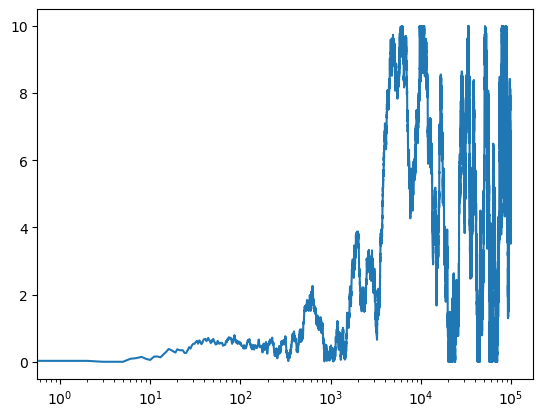

In [189]:
plt.plot(traj)
plt.xscale('log')

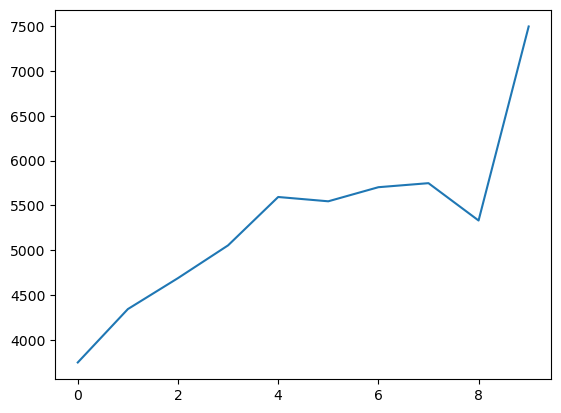

In [190]:
plt.plot(H)

In [173]:
np.mean(H)

100000.0